<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель исследования - провести исследовательский анализ данных:
1)Сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
2)Какие факторы больше всего влияют на стоимость квартиры? 
3)Посчитать среднюю цену квадратного метра в 10 населённых пунктах. 
4)выяснить, какая область входит в центр. 

Ход исследования.
Данные о представлены в файле /datasets/real_estate_data.csv. О качестве данных ничего неизвестно, поэтому перед проведением исследовательского анализа данных понадобится обхор данных. Данные будут оценены на ошибки и будет оценено их влияние на исследование. Затем, на этапе предобработки данных будет проведен поиск возможности исправления самых критичных ошибок данных.

Таким образом, исследование пройдет в 5 этапов:
1. Изучение данных файла.
2. Предобработка данных.
3. Расчеты и добавление результатаов в таблицу.
4. Исследовательский анализ данных.
5. Общий вывод.

## Изучение данных из файла

In [1]:
import pandas as pd #загрузка библиотеки
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')#загрузка файла
df.head(10)#выводим первые строки таблицы

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Это произошло из-за разделителей в формате csv. Используем разделитель столбцов '\t'

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep ='\t')#загрузка файла с использованием разделителя столбцов
df.head(10)#выводим первые строки таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.describe(include='all')#выводим для просмотра основных статистических данных

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,2775,...,21421.000000,12180.000000,23650,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
unique,NaN,NaN,NaN,1491,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2018-02-01T00:00:00,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,368,NaN,NaN,NaN,NaN,NaN,2725,...,NaN,NaN,15721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.858475,6.541549e+06,60.348651,NaN,2.070636,2.771499,10.673824,34.457852,5.892358,NaN,...,10.569807,1.150082,NaN,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,NaN,1.078405,1.261056,6.597173,22.030445,4.885249,NaN,...,5.905438,1.071300,NaN,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,NaN,0.000000,1.000000,1.000000,2.000000,1.000000,NaN,...,1.300000,0.000000,NaN,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,NaN,1.000000,2.520000,5.000000,18.600000,2.000000,NaN,...,7.000000,0.000000,NaN,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,NaN,2.000000,2.650000,9.000000,30.000000,4.000000,NaN,...,9.100000,1.000000,NaN,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,NaN,3.000000,2.800000,16.000000,42.300000,8.000000,NaN,...,12.000000,2.000000,NaN,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000


In [4]:
df.info()#выводим сводную информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Итак, в таблице 22 столбца. 
Типы данных в толбцах: int64, float64, object, bool.

Согласно документации к данным:
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах(м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении

В названиях колонок нарушения стиля не видны.
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

### Вывод

Данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Это произошло из-за разделителей в формате csv. Использовав разделитель столбцов '\t', устранили проблему.
После преобразования таблицы установлено следующее.
В каждой строке таблицы данные объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за разные года.
Часть колонок описывает квартиру: метраж, балкон и т.д., другая часть описывает инфраструктуру и расположение. Также приведены сведения о самом объявлении.
Предварительно можно утверждать, что данных достаточно для проведения исследования. Но, в данных встречаются проблемы:
1. Есть пропущенные значения.
2. Данные отнесены к другим типам данных.

После предобработки данных исследование станет более точным.
Чтобы двигаться дальше необходимо устранить проблемы в данных.

## Предобработка данных

In [5]:
df.isna().sum()#определим пропущенные значения в таблице

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
df.isna().sum()*100/len(df)

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [7]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [8]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,38.8
floors_total,0.36
living_area,8.03
floor,0
is_apartment,88.29


In [9]:
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
is_apartment,20924,0.88
parks_nearest,15620,0.66
ponds_nearest,14589,0.62
balcony,11519,0.49
ceiling_height,9195,0.39
airports_nearest,5542,0.23
cityCenters_nearest,5519,0.23
ponds_around3000,5518,0.23
parks_around3000,5518,0.23
days_exposition,3181,0.13


1)Как видно из данных, приведенных в таблице выше, для некоторых пропущенных значений можно предположить 
логичную замену:
- is_apartment определяет, является ли эта квартира апартаментами или нет и представляет собой булево значение. 
В случае, если человек не указал, что квартира является апартаментами, то, скорее всего это жилая недвижимость.
- balcony показывает наличие балкона в квартире. В случае, если человек не указал число балконов, то 
их скорее всего нет.
- floors_total определяет сколько всего этажей в домe. В случае, если человек не указал количество этажей в доме, то самим определить этажность дома не представляется возможным.
- days_exposition определяет, сколько дней было размещено объявление (от публикации до снятия). В случае, если в указанном столбце отсутствует количество, скорее всего квартира еще не снята с продажи. 
Исходя из вышеизложенного, такие пропуски правильно заменить на 0. 

2)Для других типов данных нет подходящего значения на замену, а именно: 
- ceiling_height определяет высоту потолков. Указанную информацию невозможно рассчитать из других данных.
- locality_name определяет название населённого пункта. Невозможно определить населенный пункт по описанию квартиры. 

В этом случае правильно оставить эти значения пустыми. 

3)Заполним следующие пропуски, поскольку приведенные данные получены автоматически на основе картографических данных (например, расстояние до центра, аэропорта, ближайшего парка и водоёма), то заполним данные медианными значениями в зависимости от населенного пункта.

- airports_nearest         
- cityCenters_nearest  
- parks_around3000 
- parks_nearest 
- ponds_around3000 
- ponds_nearest 

Заполним пропуски в столбце kitchen_area, который определяет площадь кухни. Для заполнения пропусков выберем медианное значение размера кухни, в зависимости от количества комнат в квартире.


Заполним пропуски на 0.

In [10]:
for col in ['is_apartment', 'balcony', 'floors_total', 'days_exposition']:#цикл для замены пропущенных значений на 0
    df[col].fillna(0, inplace=True)
df.head()#выведем на экран первые 5 строк, чтобы убедиться в полученном результате

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,0,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,0,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,0,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,0,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,0,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Проведем замену пропущенных значений на медианные значения методом transform().

In [11]:
df_transformed = df.groupby('rooms')['kitchen_area'].transform('median')#проведем замену значений на медианные значения, сгруппированные по столбцу rooms
df['kitchen_area'] = df['kitchen_area'].fillna(df_transformed)
df['kitchen_area'].value_counts().sort_index()#выведем на экран полчившиеся уникальные отсортированные значения

1.30      1
2.00      7
2.30      1
2.40      1
2.89      1
         ..
93.20     1
100.00    1
100.70    1
107.00    1
112.00    1
Name: kitchen_area, Length: 971, dtype: int64

In [12]:
df_transformed = df.groupby('locality_name')['airports_nearest'].transform('median')#проведем замену значений на медианные значения, сгруппированные по столбцу locality_name
df['airports_nearest'] = df['airports_nearest'].fillna(df_transformed)
df['airports_nearest'].value_counts().sort_index()#выведем на экран полчившиеся уникальные отсортированные значения

0.0        1
6450.0     2
6914.0     1
6949.0     1
6989.0     6
          ..
83758.0    1
84006.0    1
84665.0    1
84853.0    1
84869.0    1
Name: airports_nearest, Length: 8279, dtype: int64

In [13]:
df_transformed = df.groupby('locality_name')['parks_around3000'].transform('median')#проведем замену значений на медианные значения, сгруппированные по столбцу locality_name
df['parks_around3000'] = df['parks_around3000'].fillna(df_transformed)
df['parks_around3000'].value_counts().sort_index()#выведем на экран полчившиеся уникальные отсортированные значения

0.0    10229
1.0     5681
2.0     1748
3.0      647
Name: parks_around3000, dtype: int64

In [14]:
df_transformed = df.groupby('locality_name')['cityCenters_nearest'].transform('median')#проведем замену значений на медианные значения, сгруппированные по столбцу locality_name
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df_transformed)
df['cityCenters_nearest'].value_counts().sort_index()#выведем на экран полчившиеся уникальные отсортированные значения

181.0      1
208.0      1
215.0      1
287.0      1
291.0      1
          ..
64857.0    1
65105.0    1
65764.0    1
65952.0    1
65968.0    1
Name: cityCenters_nearest, Length: 7646, dtype: int64

In [15]:
df_transformed = df.groupby('locality_name')['parks_nearest'].transform('median')#проведем замену значений на медианные значения, сгруппированные по столбцу locality_name
df['parks_nearest'] = df['parks_nearest'].fillna(df_transformed)
df['parks_nearest'].value_counts().sort_index()#выведем на экран полчившиеся уникальные отсортированные значения

1.0       1
3.0       1
4.0       1
7.0       1
9.0       2
         ..
2905.0    1
2984.0    1
3013.0    1
3064.0    1
3190.0    2
Name: parks_nearest, Length: 998, dtype: int64

In [16]:
df_transformed = df.groupby('locality_name')['ponds_around3000'].transform('median')#проведем замену значений на медианные значения, сгруппированные по столбцу locality_name
df['ponds_around3000'] = df['ponds_around3000'].fillna(df_transformed)
df['ponds_around3000'].value_counts().sort_index()#выведем на экран полчившиеся уникальные отсортированные значения

0.0    9099
1.0    5780
2.0    1925
3.0    1501
Name: ponds_around3000, dtype: int64

In [17]:
df_transformed = df.groupby('locality_name')['ponds_nearest'].transform('median')#проведем замену значений на медианные значения, сгруппированные по столбцу locality_name
df['ponds_nearest'] = df['ponds_nearest'].fillna(df_transformed)
df['ponds_nearest'].value_counts().sort_index()#выведем на экран полчившиеся уникальные отсортированные значения

13.0      2
16.0      8
19.0      4
20.0      5
22.0      7
         ..
1299.0    1
1313.0    1
1337.0    1
1341.0    2
1344.0    1
Name: ponds_nearest, Length: 1098, dtype: int64


Используя метод duplicated() установим существуют ли в таблице одинаковые строки с идентичной информацией.

In [18]:
df.duplicated().sum()

0

Строки с идентичной информацией в таблице отсутствуют.

Переведем данные столбца floors_total из  значения float64 в int64.

In [19]:
df["floors_total"] = df["floors_total"].astype('int')#Перевод значений столбца в другой тип данных, а именно: int для целых чисел
df["floors_total"].value_counts().sort_index()#выведем уникальные отсортированные значения столбца floors_total

0       86
1       25
2      383
3      668
4     1200
5     5788
6      914
7      592
8      390
9     3761
10    1174
11     203
12    1362
13     229
14     553
15     365
16    1376
17     833
18     505
19     339
20     271
21     158
22     286
23     352
24     469
25    1075
26     124
27     164
28      21
29       1
33       1
34       1
35      24
36       3
37       1
52       1
60       1
Name: floors_total, dtype: int64

***Вывод***

для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать;
заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения;
укажите причины, которые могли привести к пропускам в данных.
приведите данные к нужным типам:
поясните, в каких столбцах нужно изменить тип данных и почему.


## Расчёты и добавление результатов в таблицу

Переведем данные в стоблце first_day_exposition в тип datetime. Для доступа к отдельным компонентам даты (день недели, год и месяц) используем атрибут `.dt` столбца first_day_exposition.

In [20]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')# Перевод из строки в дату и время. 
df['weekday'] = df['first_day_exposition'].dt.weekday# Получим день недели
display(df['weekday'])

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday, Length: 23699, dtype: int64

In [21]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')# Перевод из строки в дату и время. 
df['year'] = df['first_day_exposition'].dt.year# Получим год
display(df['year'])

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23699, dtype: int64

In [22]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')# Перевод из строки в дату и время. 
df['month'] = df['first_day_exposition'].dt.month# Получим месяц
display(df['month'])

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23699, dtype: int64

Сделаем группировку этажей квартиры на первый, последний, другой. Для группировки используем метод where(), как способ выборочного переименования.

In [23]:
df['df_floor'] = df['floor'].where((df['floor'] == df['floors_total']) | (df['floor'] == 1), "Другой")# Если не выполняется условие - первый параметр, то значение заменяется на второй параметр
df['df_floor'] = df['df_floor'].where(df['floor'] != df['floors_total'], 'Последний')
df['df_floor'] = df['df_floor'].replace(1, 'Первый')
display(df.tail(15))#выведем на экран
df['df_floor'].value_counts()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,year,month,df_floor
23684,20,21400000.0,145.00,2018-11-02,4,3.00,26,71.4,17,0,...,11459.0,0.0,460.0,0.0,503.0,0.0,4,2018,11,Другой
23685,15,2490000.0,31.00,2019-01-24,1,2.50,5,17.3,5,0,...,51818.0,0.0,407.0,0.0,553.0,0.0,3,2019,1,Последний
23686,8,3300000.0,31.00,2017-04-29,1,2.55,9,18.0,6,0,...,11602.0,1.0,140.0,1.0,317.0,193.0,5,2017,4,Другой
23687,6,3200000.0,39.00,2017-12-16,1,NaN,9,20.0,6,0,...,16704.0,0.0,460.0,0.0,503.0,38.0,5,2017,12,Другой
23688,19,9200000.0,101.00,2019-04-01,3,3.05,15,63.0,12,0,...,14428.0,0.0,460.0,0.0,503.0,23.0,0,2019,4,Другой
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.3,4,0,...,16081.0,1.0,353.0,2.0,652.0,29.0,2,2018,2,Другой
23690,3,5500000.0,52.00,2018-07-19,2,NaN,5,31.0,2,0,...,6263.0,1.0,300.0,0.0,503.0,15.0,3,2018,7,Другой
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,0,...,4489.0,0.0,460.0,1.0,806.0,519.0,3,2016,10,Другой
23692,2,1350000.0,30.00,2017-07-07,1,NaN,5,17.5,4,0,...,NaN,NaN,NaN,NaN,NaN,413.0,4,2017,7,Другой
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,0,...,34104.0,1.0,352.0,1.0,675.0,239.0,4,2016,8,Другой


Другой       17446
Последний     3361
Первый        2892
Name: df_floor, dtype: int64

Рассчитаем соотношение жилой и общей площади квартиры.

In [24]:
df['non_res_area'] = df['living_area']/df['total_area']#добавим новый столбец в таблицу с соотношением  жилой и общей площади квартиры
df['non_res_area'].head()#выведем получившийся результат на экран (первые 5 строк)   

0    0.472222
1    0.460396
2    0.612500
3         NaN
4    0.320000
Name: non_res_area, dtype: float64

Рассчитаем отношение площади кухни к общей площади.

In [25]:
df['ratio_kit_area'] = df['kitchen_area']/df['total_area']#добавим новый столбец в таблицу с соотношением  полщади кухни и общей площади квартиры
df['ratio_kit_area'].head()#выведем получившийся результат на экран (первые 5 строк) 

0    0.231481
1    0.272277
2    0.148214
3    0.059748
4    0.410000
Name: ratio_kit_area, dtype: float64

Рассчитаем цену квадратного метра стоимости квартиры.

In [26]:
df['square_metres'] = df['last_price']/df['total_area']#добавим новый столбец в таблицу со стоимостью квадратного метра квартиры
df['square_metres'].head()#выведем получившийся результат на экран (первые 5 строк)

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: square_metres, dtype: float64

**Вывод**
цену квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.

## Исследовательский анализ данных

Изучим параметры квартиры: площадь, цену, число комнат, высоту потолков. Построим гистограммы для каждого параметра.

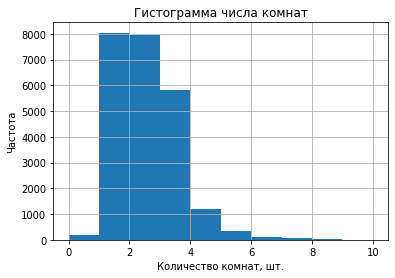

In [27]:
import matplotlib.pyplot as plt # импортируем библиотеку, стандартно используется имя plt
df['rooms'].hist(range=(0,10))# Отобразим гистограмму с отображаемыми минимальным и максимальным значением min_value = 0 и max_value = 10 
plt.title('Гистограмма числа комнат')
plt.xlabel('Количество комнат, шт.')
plt.ylabel('Частота')
plt.show() # даём команду отобразить гистограмму


Гистограмма количества комнат в квартире говорит, что в выборке больше всего 2-3 х комантных квартир.
Для определения выбросов установим межквартильный размах.

In [28]:
df['rooms'].describe(include='all')#выводим для просмотра основных статистических данных

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Исходя из данных, приведенных выше, Межквартильный диапазон (IQR) = Q3-Q1 = 3-1=2
В этом случае определим выбросы, который будут лежать не в диапазоне 1,5 межквартильного размаха:
которые ниже будет = 0 (или нижний ус),
и который выше Q3 + 1,5x IQR = 3+1,5*2 =6 (или верхний ус).
Таким образом, аномальными для выборки будут квартиры с количеством комнат больше 6.

In [29]:
df['too_many_rooms'] = df['rooms'] > 6

In [30]:
df['ceiling_height'].describe()#выводим для просмотра основных статистических данных

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

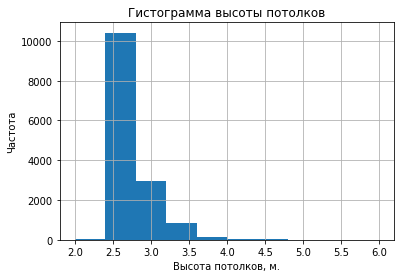

In [31]:
import matplotlib.pyplot as plt # импортируем библиотеку, стандартно используется имя plt
df['ceiling_height'].hist(range=(2,6))# Отобразим гистограмму с отображаемыми минимальным и максимальным значением min_value = 0 и max_value = 10 
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м.')
plt.ylabel('Частота')
plt.show() # даём команду отобразить гистограмму

Гистограмма высоты потолков говорит, что в выборке большинство кварит имеют высоту потолков 2.5 метра.

In [32]:
df['ceiling_height'].describe(include='all')#выводим для просмотра основных статистических данных

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Исходя из данных, приведенных выше, Межквартильный диапазон (IQR) = Q3-Q1 = 2.80-2.52=0.28
В этом случае определим выбросы, который будут лежать не в диапазоне 1,5 межквартильного размаха:
которые ниже будет = 1 (или нижний ус), при этом, квартиры с такими потолками являются аномальными.
и который выше Q3 + 1,5x IQR = 2,82+1,5*0,28 = 3,24 (или верхний ус).
Таким образом, аномальными для выборки будут квартиры с высотой потолков больше от 2.52 до 3.24 м.

In [33]:
df['too_much_ceiling_height'] = df['ceiling_height'] > 3.24

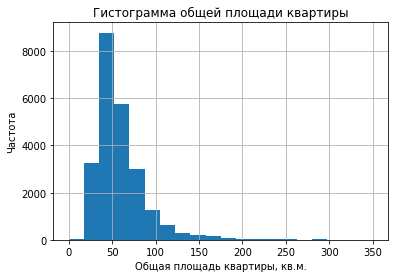

In [34]:
df['total_area'].hist(bins=20, range=(0,350))# Отобразим гистограмму с числом корзин 20_bins и отображаемыми минимальным и максимальным значением min_value = 0 и max_value = 350 
plt.title('Гистограмма общей площади квартиры')
plt.xlabel('Общая площадь квартиры, кв.м.')
plt.ylabel('Частота')
plt.show()# даём команду отобразить гистограмму

Гистограмма общей площади квартиры говорит, что в выборке большинство квартир имеют площадь 50 метров.

In [35]:
df['total_area'].describe()#выводим для просмотра основных статистических данных

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Исходя из данных, приведенных выше, Межквартильный диапазон (IQR) = Q3-Q1 = 69.90-40 = 29.9
В этом случае определим выбросы, который будут лежать не в диапазоне 1,5 межквартильного размаха:
которые ниже будет Q1= 40-1.5*29.9= -4.85(или нижний ус), при этом, квартиры с такими количеством метров являются аномальными.
и который выше Q3 + 1,5x IQR = 69.9+1,5*29.9 = 114.75 (или верхний ус).
Таким образом, аномальными для данной выборки будут квартиры с количеством метров больше 114.75м.

In [36]:
df['too_much_total_area'] = df['total_area'] > 114.75

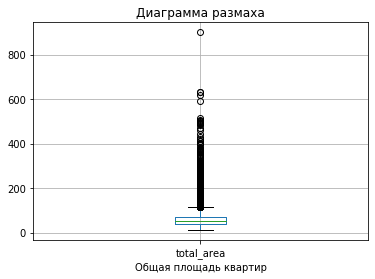

In [37]:
df.boxplot('total_area')
plt.title('Диаграмма размаха')
plt.xlabel('Общая площадь квартир')
plt.show()# Отображение диаграммы ящик с усами

При этом, график boxplot говорит, что аномальных квартир в диапазоне до 500 м. достаточно много. Такие квартиры (или дома) существуют, пожтому удалять из выборки данные будет некорректно.

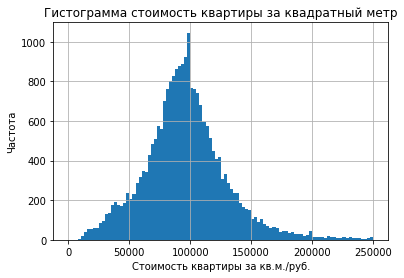

In [38]:
df['square_metres'].hist(bins=100, range=(100, 250000))# Отобразим гистограмму с числом корзин 100_bins и отображаемыми минимальным и максимальным значением min_value = 100 и max_value = 20000000
plt.title('Гистограмма стоимость квартиры за квадратный метр')
plt.xlabel('Стоимость квартиры за кв.м./руб.')
plt.ylabel('Частота')
plt.show()# даём команду отобразить гистограмму

In [39]:
df['square_metres'].describe()#выводим для просмотра основных статистических данных

count    2.369900e+04
mean     9.942166e+04
std      5.030680e+04
min      1.118349e+02
25%      7.658547e+04
50%      9.500000e+04
75%      1.142563e+05
max      1.907500e+06
Name: square_metres, dtype: float64

Исходя из данных, приведенных выше, Межквартильный диапазон (IQR) = Q3-Q1 = 114.26-76.59 = 37.67
В этом случае определим выбросы, который будут лежать не в диапазоне 1,5 межквартильного размаха:
которые ниже будет Q1= 76.59-1.5*37.67= 20.09(или нижний ус), 
и который выше Q3 + 1,5x IQR = 114.26+1,5*37.67 = 170.77 (или верхний ус).
Таким образом, аномальными для данной выборки будут квартиры с ценой в диапазоне от 20.09 до 170.77 тыс.рублей за квадратный метр.

In [40]:
df['too_expensive'] = df['square_metres'] > 170770
df['too_cheap'] = df['square_metres'] < 20090
display(df['too_cheap'].tail())

23694    False
23695    False
23696    False
23697    False
23698    False
Name: too_cheap, dtype: bool

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

good_df = df[
    (df['too_expensive']==False) &
    (df['too_cheap']==False) &
    (df['too_much_total_area']==False) &
    (df['too_much_ceiling_height']==False) &
    (df['too_many_rooms']==False)]#.reset_index(drop=True)
display(len(good_df))
for column in ['rooms', 'total_area', 'ceiling_height', 'square_metres']:
    sn.catplot(x=column, y='last_price', kind= 'box', data=good_df, palette='husl')

21250

In [ ]:
df.boxplot('square_metres')
plt.title('Диаграмма размаха')
plt.xlabel('Стоимость квадратного метра квартиры, кв.м./руб.')
plt.show()# Отображение диаграммы ящик с усами

Гистограмма стоимости квадратного метра кваритры говорит о том, что большинство квартир в выборке имеют стоимость 100 тыс. рублей за квадратный метр.
   
    
***ВЫВОД***

Таким образом, для всей выборки аномальными будут являться следующие квартиры:
1) с количеством комнат больше 6.

2) с ценой в диапазоне от 20.09 до 170.77 рублей за квадратный метр.

3) с количеством метров больше 114.75м.

4) с высотой потолков больше от 2.52 до 3.24 м.

Изучим время продажи квартиры. Построим гистограмму.

In [ ]:
df['days_exposition'].hist(bins=10)# Отобразим гистограмму с числом корзин 3_bins
plt.title('Гистограмма времени продажи квартиры')
plt.xlabel('Время продажи квартиры, дн.')
plt.ylabel('Частота')
plt.show()# даём команду отобразить гистограмму

Гистограмма дней размещения объявления говорит, что большинство квартир в выборке было продано в период до 500 дней.

Посчитаем среднее и медиану. Для этого используем метод describe()

In [ ]:
df['days_exposition'].describe()#выводим для просмотра основных статистических данных

Исходя из данных, изложенных в таблице выше, среднее количество дней родажи составляет 157 дней, а медианное значение составляет - 74 дня.
С помощью диаграммы размаха отобразим все квартили для заданных данных.  

В размах «усов» попадают нормальные значения, а за пределами находятся выбросы, изображённые точками. Нижний ус упирается в 0, минимальное значение.
Таким образом, большая часть значений лежит в диапазоне до 430, что выглядит правдоподобно. На гистограмме видно, что продажи продолжительностью 500 дней уже редки, больше 1000 совсем мало, так как срок слишком большой.

Но при этом первый квартиль лежит на уровне менее 22 дней, а это слишком мало.

Уберем редкие и выбивающиеся значения. 

In [ ]:
df.query('22<days_exposition<500')

Изучим, какие факторы больше всего влияют на стоимость квартиры, такие как:

1) зависит ли цена от площади.

2) зависит ли цена от числа комнат.

3) зависит ли цена от удалённости от центра.

In [ ]:
display(df["cityCenters_nearest"].corr(df['square_metres']))# Вычисление коэффициента корреляции Пирсона

Как видно из данных, коэффициент корреляции ближе к 0. Значит, при изменении расстояния от центра, стоимость квадратного метра может не изменяться.

In [ ]:
display(df["total_area"].corr(df['last_price']))# Вычисление коэффициента корреляции Пирсона

Как видно из данных, коэффициент Пирсона положительный. Корреляция в 0,65 говорит о том, что связь есть. Значит, при изменении общей площади квартиры, увеличивается стоимость квартиры. 

In [ ]:
df["rooms"].corr(df['last_price'])# Вычисление коэффициента корреляции Пирсона

Как видно из данных, коэффициент корреляции ближе к 0. Значит, при изменении увеличении количества комнат, стоимость квартиры может не изменяться.

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
df_corr = pd.DataFrame(df,columns=['rooms', 'last_price', 'total_area', 'cityCenters_nearest', 'square_metres'])
corrMatrix = df_corr.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 

In [ ]:
df.groupby("df_floor")['square_metres'].mean()# проведем группировку постолбцу  df_floor и подсчетом среднего значения по столбцу square_metres

Как видно из данных, привдененных выше, самая дешевая стоимость квадратного метра у квартир, расположенных на 1 этаже, и самая дорогая стоимость квадратного метра у квартир, расположенных  не на 1 и не на последнем этажах.

Также изучим зависимость от даты размещения: дня недели, месяца и года.

In [ ]:
display(df["year"].corr(df['last_price']))# Вычисление коэффициента корреляции Пирсона

Как видно из данных, коэффициент корреляции ближе к 0. Значит, при изменении года размещения объявления, стоимость  квартиры может не изменяться.

In [ ]:
df['year'].describe(include='all')#выводим для просмотра основных статистических данных

In [ ]:
df.boxplot('year')
plt.title('Диаграмма размаха')
plt.ylabel('Год публикации')
plt.show()# Отображение диаграммы ящик с усами

In [ ]:
display(df["month"].corr(df['last_price']))# Вычисление коэффициента корреляции Пирсона

Как видно из данных, коэффициент корреляции ближе к 0. Значит, при изменении месяца размещения объявления, стоимость  квартиры может не изменяться.

In [ ]:
df['month'].describe(include='all')#выводим для просмотра основных статистических данных

In [ ]:
df.boxplot('month')
plt.title('Диаграмма размаха')
plt.ylabel('Месяц публикации')
plt.show()# Отображение диаграммы ящик с усами

In [ ]:
display(df["weekday"].corr(df['last_price']))# Вычисление коэффициента корреляции Пирсона

Как видно из данных, коэффициент корреляции ближе к 0. Значит, при изменении дня размещения объявления, стоимость  квартиры может не изменяться.

In [ ]:
df['weekday'].describe(include='all')#выводим для просмотра основных статистических данных

In [ ]:
df.boxplot('weekday')
plt.title('Диаграмма размаха')
plt.ylabel('День публикации')
plt.show()# Отображение диаграммы ящик с усами

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
df = pd.DataFrame(df,columns=['weekday','last_price','month', 'year'])
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

 Выберем 10 населённых пунктов с наибольшим числом объявлений.

In [ ]:
top_locality_name = df.groupby('locality_name')['last_price'].count().sort_values(ascending=False).head(10)#проведем группировку по количеству значений, по убыванию данных по столбцу locality_name
display(top_locality_name)

Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. 

In [ ]:
df_top = df.groupby('locality_name')[['total_area', 'last_price']].sum()#проведем группировку по столбцу locality_name и проведем подсчёт суммы в группе
df_top = df_top.query('index in @top_locality_name.index')# оставим в таблице сведения только по 10 населенным пунктам из top_locality_name
df_top['square_metres'] = df_top['last_price'] / df_top['total_area']#добавим новый столбец в таблицу со стоимостью квадратного метра квартиры для сгруппированных данных
df_top = df_top[['square_metres']]#оставим в таблице только столбец square_metres
display(df_top)#выведем на экран среднюю цену в 10 населенных пунктах
display(df_top[(df_top['square_metres'] == df_top['square_metres'].max()) | (df_top['square_metres'] == df_top['square_metres'].min())])#выведем max(), min()

 Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге ('locality_name'). Выясним, какая область входит в центр. 

In [ ]:
df_city_locality = df[df['locality_name'] == 'Санкт-Петербург']#проведем логическую индексацию и выведем все строки, удовлетворяющие условию
display(df_city_locality.head(15))#выведем на экран

Создадим столбец km с расстоянием до центра в километрах: округлим до целых значений, используя //. Посчитаем среднюю цену для каждого километра.

In [ ]:
df_city = df.query('locality_name in @df_city_locality.locality_name')#выберем только значения из df_city_locality
df_city['km'] = df_city['cityCenters_nearest'] // 1000#переведем метры в километры
df_city['price_km'] = df_city['km'] / df_city['last_price']# посчитаем цену за км 
display(df_city['price_km'])# выведем на экран

Построим график, который показывает, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

In [ ]:
df_city.groupby('km').mean().sort_index().reset_index().plot(x='km', y='last_price', grid = True)#построим график 
plt.title('График удаленности от центра')
plt.xlabel('km')
plt.ylabel('last_price')
plt.show()

Выделим сегмент квартир в центре. Как видно на графике, на расстоянии до 10 км цена сильно падает. с 10 км до 25 км цена уменьшается не так резко, а дальше колеблется. Таким образом, примем за центр расстояние до 10 км.
Проведем анализ этой территории и изучим следующие параметры: площадь, цена, число комнат, высота потолков.

In [ ]:
df_city['is_center'] = df_city['km']<=10 # добавим столбец, в котором определим, что расстояние до центра не более 10 км.
df_city_center = df_city[df_city['is_center']]#проведем срез таблицы для всех значений is_center
df_city_center = df_city_center[['total_area', 'square_metres', 'rooms', 'ceiling_height']]#определим столбцы, необходимые для анализа
pd.plotting.scatter_matrix(df_city_center)#построим график scatter_matrix
plt.show()

In [ ]:
(len(df[df['cityCenters_nearest'] <= 10000])/(len(df)))

Изучим ячейки подробнее.
1) В верхней левой ячейке связь количества метров в квартире с количеством метров в квартире. Видно, что большинство квартир в выборке больше 500 метров (около 800-900 метров).
2) В ячейке ниже связь стоимости за квадратный метр и площади квартиры. Видно, что стоимость за квадратный метр квартиры до 500 м в среднем стоит 500 тысяч, но есть выбросы, которые говорят о том, что стоимость отдельных квартир достигает 1 млн руб. и даже больше.
3) Площадь квартиры и количество комнат: Количество комнат увеличивается  до 250 м., от 250 до 400 м количество комнат снижается.
4) Высота потолков и площадь квартиры. Высота потолков не зависит от площади квартиры.
5) Гистограмма количества комнат говорит, что 2-3х комнатных квартир в выборке больше.
6) Гистограмма стоимости за квадратный метр говорит, что в выборке больше количество квартир с ценой за квадраный метр больше 1 млн рублей.


Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
df_corr = pd.DataFrame(df_city_center,columns=['total_area', 'square_metres', 'rooms', 'ceiling_height'])
corrMatrix = df_corr.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df_city_center.describe()#выводим для просмотра основных статистических данных


1)total_area
Исходя из данных, приведенных выше, Межквартильный диапазон (IQR) = Q3-Q1 = 95-46.2= 48.8
В этом случае определим выбросы, который будут лежать не в диапазоне 1,5 межквартильного размаха: 
которые ниже будет Q1 - 1,5x IQR = 46.2-1.5*48.8=-27 (или нижний ус),
и который выше Q3 + 1,5x IQR = 95+1.5*48.8 = 168,2 (или верхний ус). 
Таким образом, аномальными для выборки будут квартиры с площадью больше 168.2 метров.

2) square_metres
Исходя из данных, приведенных выше, Межквартильный диапазон (IQR) = Q3-Q1 = 143.3-96.9=46.4
В этом случае определим выбросы, который будут лежать не в диапазоне 1,5 межквартильного размаха: 
которые ниже будет Q1 - 1,5x IQR = 96.9 - 1.5*46.4 = 27.3 (или нижний ус),
и который выше Q3 + 1,5x IQR = 143.3+1.5*46.4 = 212.9 (или верхний ус). 
Таким образом, аномальными для выборки будут квартиры с ценой за квадратный метр дороже 212.9 тыс. рублей.
3) rooms
Исходя из данных, приведенных выше, Межквартильный диапазон (IQR) = Q3-Q1 = 3-2= 1
В этом случае определим выбросы, который будут лежать не в диапазоне 1,5 межквартильного размаха: 
которые ниже будет Q1 - 1,5x IQR = 0 (или нижний ус),
и который выше Q3 + 1,5x IQR = 3+1.5*1 = 4.5 или округленно 5 (или верхний ус). 
Таким образом, аномальными для выборки будут квартиры с количеством комнат больше 5.

4) ceiling_height
Исходя из данных, приведенных выше, Межквартильный диапазон (IQR) = Q3-Q1 = 3.15-2.7=0.45
В этом случае определим выбросы, который будут лежать не в диапазоне 1,5 межквартильного размаха: 
которые ниже будет Q1 - 1,5x IQR = 2.7-1.5*0.45=2.025 (или нижний ус),
и который выше Q3 + 1,5x IQR = 3.15+1.5*0.45 =3.825 (или верхний ус). 
Таким образом, аномальными для выборки будут квартиры с потолками выше 3.8 метров.

In [ ]:
df_city_center.boxplot('total_area')
plt.title('Диаграмма размаха')
plt.ylabel('Общая площадь, кв.м.')
plt.show()# Отображение диаграммы ящик с усами

In [ ]:
df_city_center.boxplot('square_metres')
plt.title('Диаграмма размаха')
plt.ylabel('Стоимость за кв.м.')
plt.show()# Отображение диаграммы ящик с усами

In [ ]:
df_city_center.hist('square_metres', range=(0,300000))
plt.title('Диаграмма размаха')
plt.xlabel('Стоимость за кв.м.')
plt.ylabel('Частота')
plt.show()# Отображение диаграммы ящик с усами

In [ ]:
df_city_center.boxplot('ceiling_height')
plt.title('Диаграмма размаха')
plt.ylabel('Высота потолков')
plt.show()# Отображение диаграммы ящик с усами

In [ ]:
df_city['is_center'] = df_city['km']<=10 # добавим столбец, в котором определим, что расстояние до центра не более 10 км.
df_city_center_factor = df_city[df_city['is_center']]#проведем срез таблицы для всех значений is_center
df_city_center_factor = df_city_center_factor[['km', 'rooms', 'floors_total', 'year']]#определим столбцы, необходимые для анализа
pd.plotting.scatter_matrix(df_city_center_factor)#построим график scatter_matrix
plt.show()


Изучим ячейки подробнее.
1) В верхней левой ячейке связь км с км. Это гистограмма, распределенная по км. Видно, что в выбоке больше квартир, расположенных на расстоянии 10 км от центра.
2) В ячейке ниже связь количества комнат и расстояния от центра. Видно, что в среднем количество комнат не сильно меняется, при этом меньше комнат на 7-8 км от центра, а больше всего на 5-6 км. от центра.
3) Этажность дома и расстояние от центра: чем дальше от центра, тем выше этажность домов.
4) Год публикации и  расстояние от центра равномерно. 
5) Гистограмма количества комнат говорит, что в выборке больше 2-3х комнатных квартир.
6) Гистограмма этажности домов говорит, что в выборке больше малоэтажных домов.
7) Гистограмма года публикации объявления говорит, что наибольшее количество объявлений в выборке за 2017 год. 


In [ ]:
display(df_city_center_factor)

In [ ]:
import numpy as np
rs = np.random.RandomState(0)
df_city_center_factor = pd.DataFrame(rs.rand(4,4))
corr = df_city_center_factor.corr()
corr.style.background_gradient('coolwarm')
#pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

**Вывод**

1) При изучении параметров: площади, цены, числа комнат, высоты потолков построили гистограммы для каждого параметра, согласно которым:
Гистограмма количиства комнат в квартире говорит, что в выборке больше всего 2-3х комантных квартир.

Гистограмма высоты потолков говорит, что в выборке большинство кварит имеют высоту потолков 2.5 метра.

Гистограмма общей площади квартиры говорит, что в выборке большинство квартир имеют площадь 50 метров.

Гистограмма стоимости за квадратный метр кваритры говорит о том, что большинство квартир в выборке имеют стоимость 100 тыс. рублей за квадратный метр. 

2) При изучении времени продажи квартиры построили гистограмму. Посчитали среднее и медиану. Установили, сколько обычно занимает продажа и когда можно считать, что продажи прошли очень быстро, а когда необычно долго, а именно:
Гистограмма дней размещения объявления говорит, что большинство квартир в выборке было продано в период до 500 дней.
Исходя из данных, изложенных в таблице выше, среднее количество дней продажи составляет 157 дней, а медианное значение составляет - 74 дня. С помощью диаграммы размаха установили, что за пределами "усов" находятся выбросы, изображённые точками. Нижний ус упирается в 0, минимальное значение. Таким образом, большая часть значений лежит в диапазоне до 430, что выглядит правдоподобно. На гистограмме видно, что продажи продолжительностью 500 дней уже редки, больше 1000 совсем мало, так как срок слишком большой. Но при этом первый квартиль лежит на уровне менее 22 дней, а это слишком мало.
Уберили редкие и выбивающиеся значения (до 22 дней и после 500 дней).

2) Изучили факторы, которые больше всего влияют на стоимость квартиры, в том числе зависит ли цена от площади, числа комнат, удалённости от центра. 

При изменении расстояния от центра, стоимость квадратного метра может не изменяться.
При изменении общей площади квартиры, увеличивается стоимость квартиры.
При увеличении количества комнат, стоимость квартиры может не изменяться.

3) Изучили зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
Самая дешевая стоимость квадратного метра у квартир, расположенных на первом этаже, и самая дорогая стоимость квадратного метра у квартир, расположенных не на первом и не на последнем этажах. 

4) Также изучили зависимость от даты размещения: дня недели, месяца и года.
Как видно из данных, коэффициент корреляции ближе к 0. Значит, при изменении года размещения объявления, стоимость квартиры может не изменяться.
Как видно из данных, коэффициент Пирсона положительный. Корреляция в 0,65 говорит о том, что связь есть. Значит, при изменении общей площади квартиры, увеличивается стоимость квартиры.
Как видно из данных, коэффициент корреляции ближе к 0. Значит, при изменении месяца размещения объявления, стоимость квартиры может не изменяться.
Как видно из данных, коэффициент корреляции ближе к 0. Значит, при изменении дня размещения объявления, стоимость квартиры может не изменяться.


3) Выбрали 10 населённых пунктов с наибольшим количеством объявлений. Посчитали среднюю цену квадратного метра в этих населённых пунктах. Выделили среди них населённые пункты с самой высокой и низкой стоимостью жилья. 
Установили, что самая низкая цена в Выборге и составляет 57898.142109 рублей за метр квадратный.
Самая высокая цена в Санкт-Петербурге и составляет 124514.621378 рублей за метр квадратный.


4) Изучили предложения квартир.Выделили квартиры в Санкт-Петербурге ('locality_name'). Выяснили, какая область входит в центр. Создали столбец с расстоянием до центра в километрах: округлили до целых значений. После этого посчитали среднюю цену для каждого километра. Построили график, который показывает, как цена зависит от удалённости от центра. Определли границу, где график сильно меняется — и установили центральную зону.
Согласно графику, на расстоянии до 10 км от центральной зоны цена сильно падает. с 10 км до 25 км цена уменьшается не так резко, а после 25 км сильно колеблется. Таким образом, приняли за центральную зону расстояние до 10 км. 


5) Провеи анализ этой территории и изучили следующие параметры: площадь, цена, число комнат, высота потолков.
Установили следующее.
1) Гистограмма количества метров в квартире. Видно, что большинство квартир в выборке больше 500 метров (около 800-900 метров). 2)Связь стоимости за квадратный метр и площади квартиры. Видно, что стоимость за квадратный метр квартиры до 500 м в среднем стоит 500 тысяч, но есть выбросы, которые говорят о том, что стоимость отдельных квартир достигает 1 млн руб. и даже больше. 3) Площадь квартиры и количество комнат: Количество комнат увеличивается в квартирах с увеличением площади квартиры до 250 м., а в квартирах. с площадью от 250 м до 400 м количество комнат снижается. 4) Высота потолков и площадь квартиры. Высота потолков не зависит от площади квартиры. 5) Гистограмма количества комнат говорит, что 2-3х комнатных квартир в выборке больше. 6) Гистограмма стоимости за квадратный метр говорит, что в выборке больше количество квартир с ценой за квадраный метр больше 1 млн рублей.

6) Также выделили факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).
Установили следующее.
1) Связь км с км. Это гистограмма, распределенная по км. Видно, что в выбоке больше квартир, расположенных на расстоянии 10 км от центра. 2) Связь количества комнат и расстояния от центра. Видно, что в среднем количество комнат не сильно меняется, при этом меньше комнат на 7-8 км от центра, а больше всего на 5-6 км от центра. 3) Этажность дома и расстояние от центра: чем дальше от центра, тем выше этажность домов. 4) Год публикации и расстояние от центра равномерно. 5) Гистограмма количества комнат говорит, что в выборке больше 2-3х комнатных квартир. 6) Гистограмма этажности домов говорит, что в выборке больше малоэтажных домов. 7) Гистограмма года публикации объявления говорит, что наибольшее количество объявлений в выборке за 2017 год.

## Общий вывод

Сравнивая общие выводы по всей выборке и выводы по центральной зоне Санкт-Петербурга можно отметить, что и там, и там больше 2-3х комнатных картир.
При этом, отличается метраж квартир: во всей выборке большинство квартир имеют метраж равный 50 кв. метров, при этом в центре площадь квартир может составлять 500 кв. метров.
Стоимость за квадратный метр квартир также отличается и составляет 100 тыс. рублей за квадратный метр во всей выборке и 500 тыс. рублей за 1 кв. м. в центральной зоне Санкт-Петербурга.

При этом, определить реальную рыночную цену поможет также отслеживание аномальных отклонений, приведенных ниже.

Для всей выборки аномальными будут являться следующие квартиры:

1) с количеством комнат больше 6.

2) с ценой дороже 170.77 тыс. рублей за квадратный метр.

3) с площадью больше 114.75м.

4) с высотой потолков до 2.52, а также выше 3.24 м.

Вместе с тем, 
При изменении общей площади квартиры, увеличивается стоимость квартиры.

Согласно данным квартир, которые находятся в центре, отклонениями могут являться:

1) с площадью больше 168.2 метров.

2) с ценой за квадратный метр дороже 212.9 тыс. рублей.

3) с количеством комнат больше 5.

4) с потолками выше 3.8 метров.

И при изменении общей площади квартиры будет увеличиваться количество комнат в квартире.

Вместе с тем, квартиры, которые находятся в центре города могут являться нестандартными и каждую квартиру стоит анализировать по отдельности.


